<a href="https://colab.research.google.com/github/erikgqp8645/-python-/blob/main/%E7%AC%AC09%E7%AB%A0_%E7%BB%98%E5%9B%BE%E5%92%8C%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

信息可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。Python有许多库进行静态或动态的数据可视化，但我这里重要关注于matplotlib（http://matplotlib.org/）和基于它的库。

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。matplotlib和IPython社区进行合作，简化了从IPython shell（包括现在的Jupyter notebook）进行交互式绘图。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。除了几张，本书中的大部分图都是用它生成的。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn（http://seaborn.pydata.org/），本章后面会学习它。

学习本章代码案例的最简单方法是在Jupyter notebook进行交互式绘图。在Jupyter notebook中执行下面的语句：

In [ ]:
%matplotlib notebook
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

在Jupyter中运行%matplotlib notebook（或在IPython中运行%matplotlib），就可以创建一个简单的图形。如果一切设置正确，会看到图9-1：

In [ ]:
import numpy as np
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

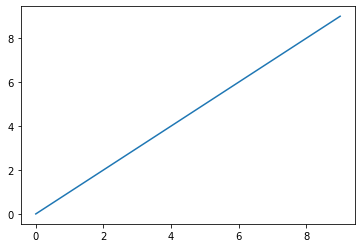

In [ ]:
plt.plot(data)

虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API。

笔记：虽然本书没有详细地讨论matplotlib的各种功能，但足以将你引入门。matplotlib的示例库和文档是学习高级特性的最好资源。

## Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：

In [ ]:
fig

<Figure size 432x288 with 0 Axes>

In [ ]:
ax2 = fig.add_subplot(2,2,2)

In [ ]:
ax2

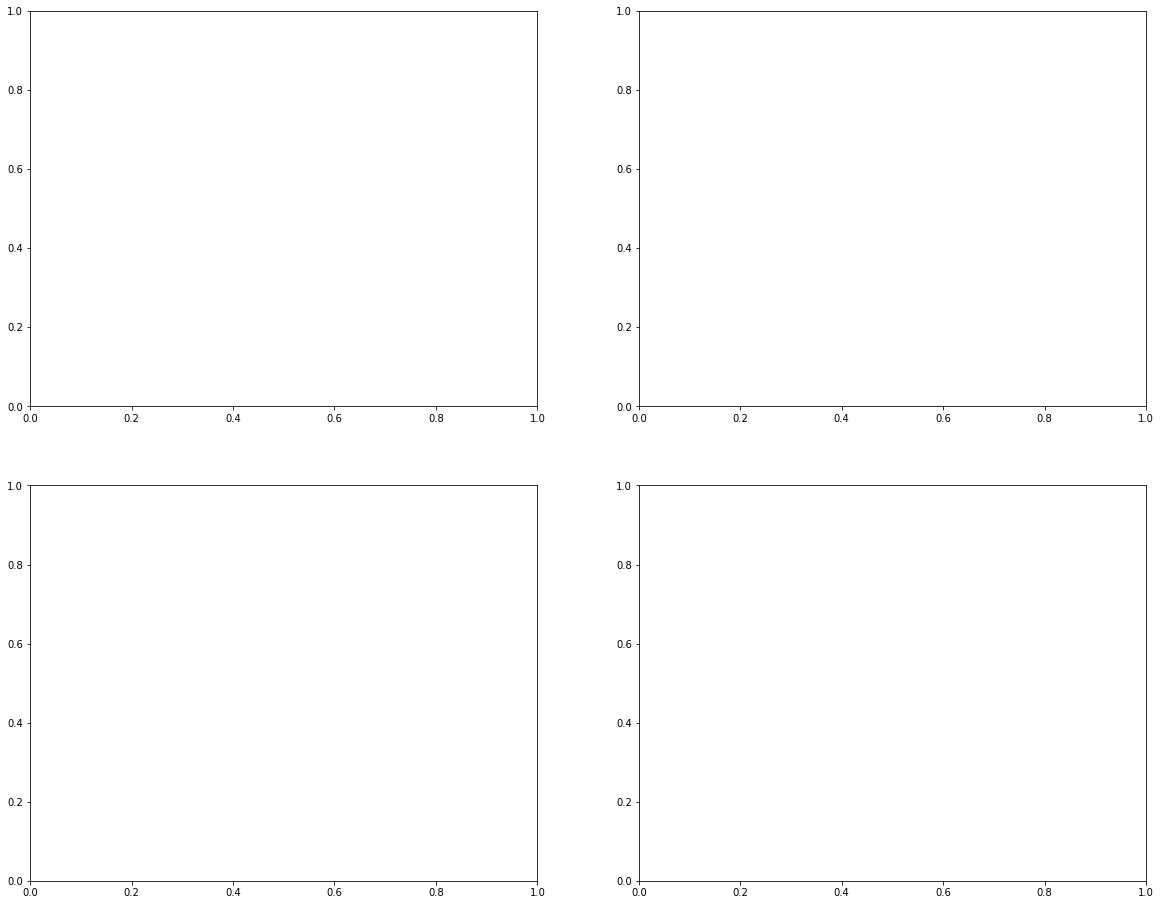

In [ ]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图9-3所示的结果：

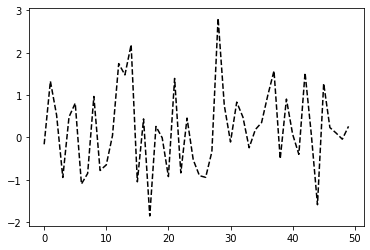

In [ ]:
plt.plot(np.random.randn(50),'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

In [ ]:
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

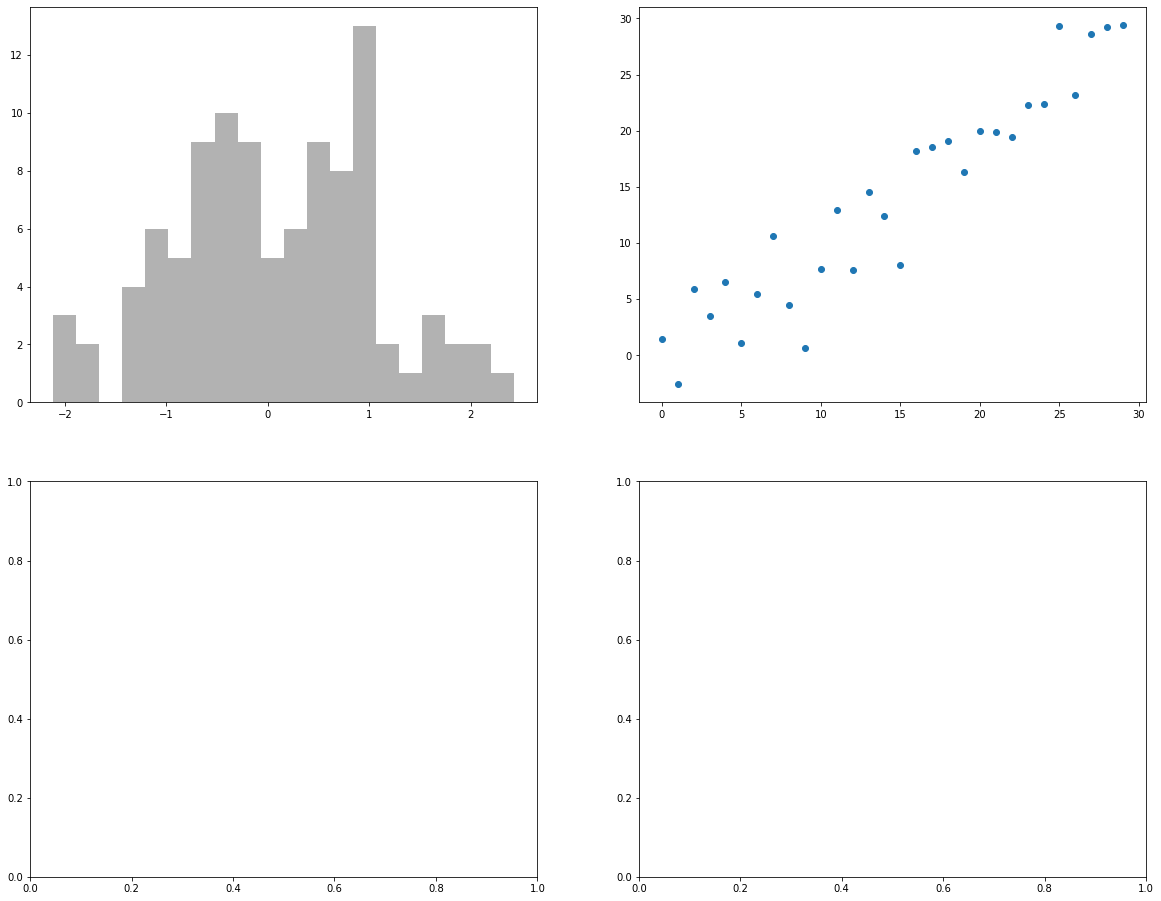

In [ ]:
fig

你可以在matplotlib的文档中找到各种图表类型。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

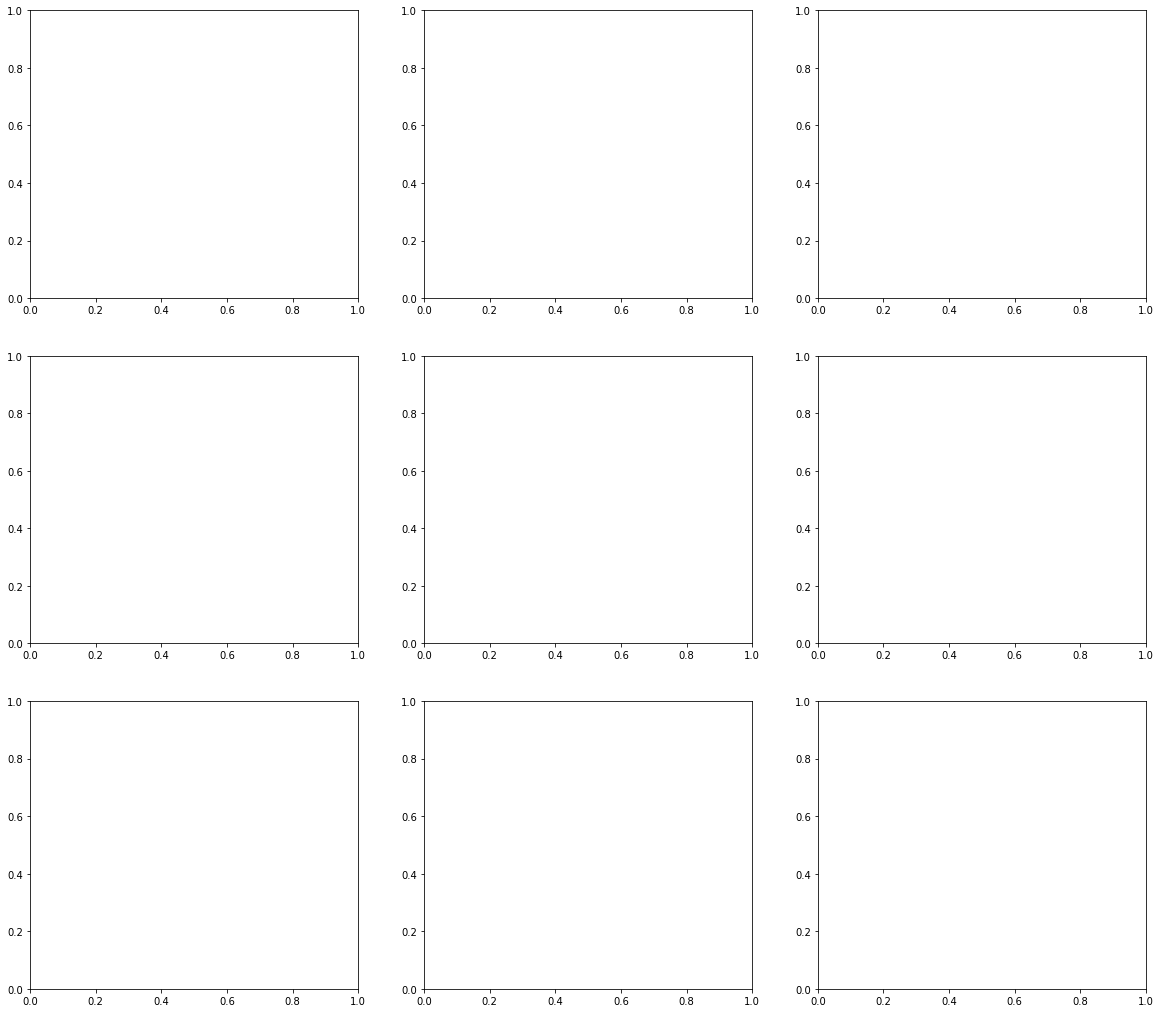

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(20,18))

In [ ]:
axes[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1065513ad0>,
      dtype=object)

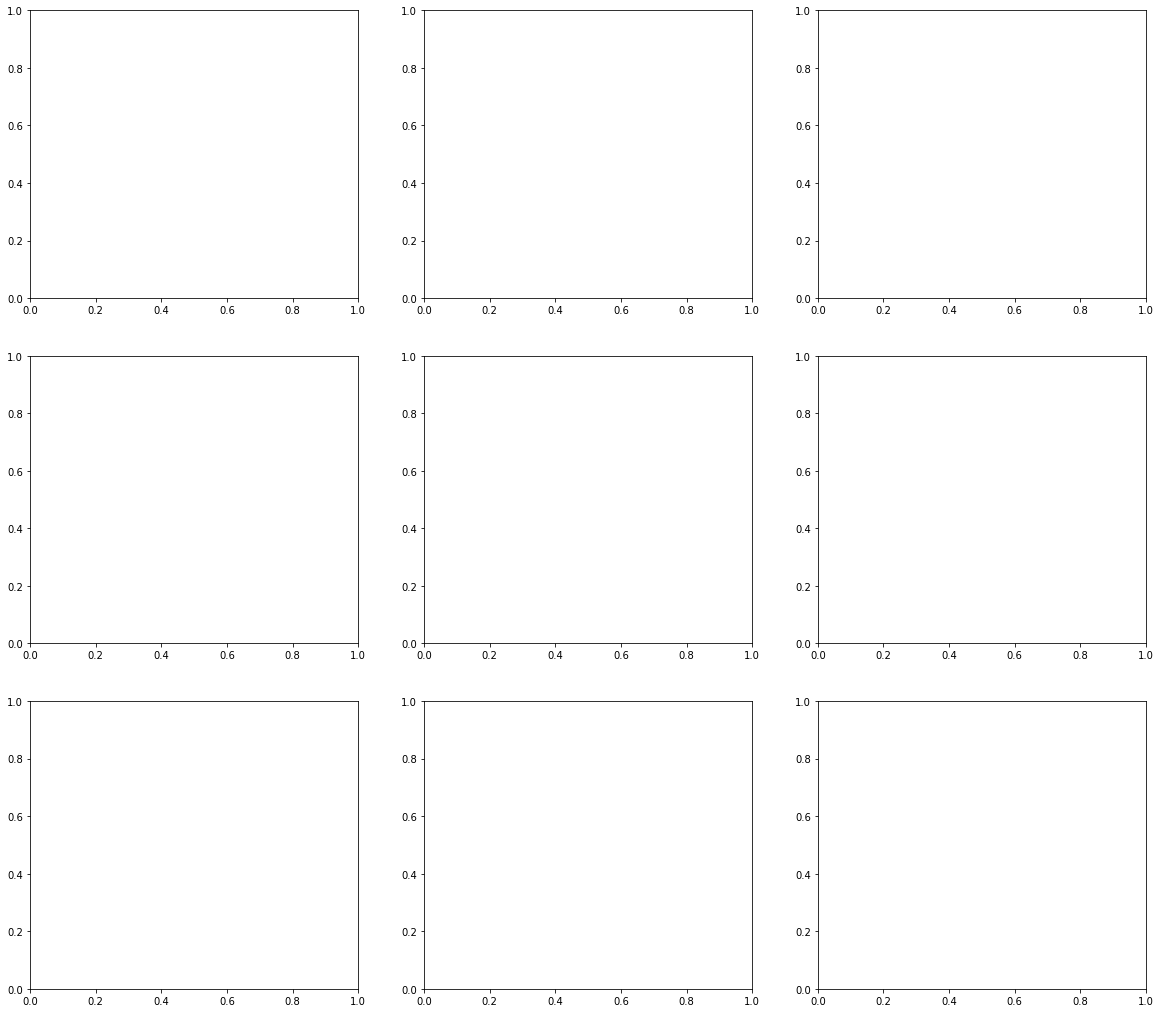

In [ ]:
fig

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见表9-1。
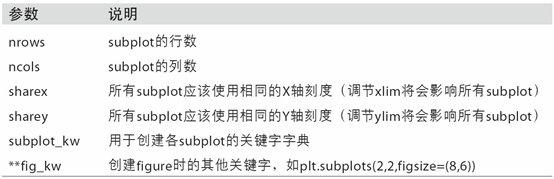

### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：


```
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```



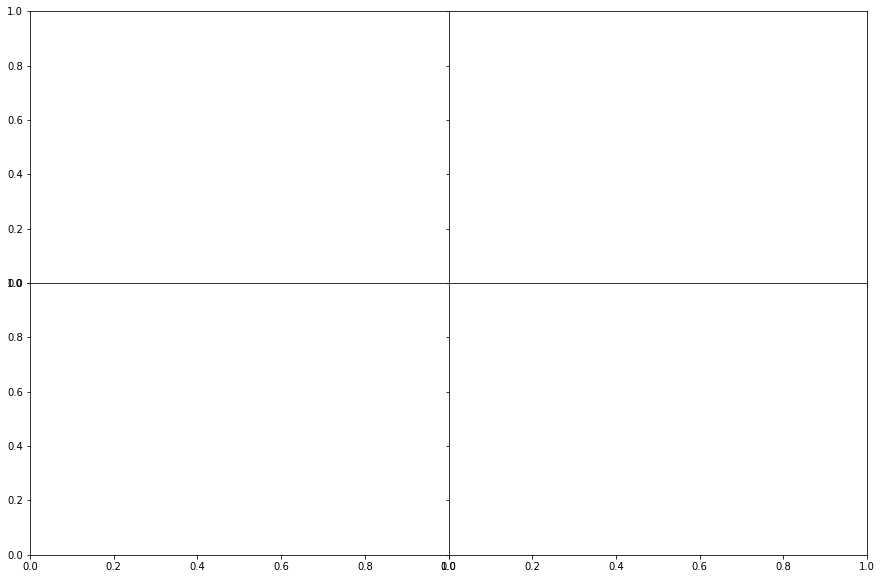

In [ ]:
fig,axis = plt.subplots(2,2,figsize=(15,10),sharex=True,sharey=True) # 共享双轴
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)